<a href="https://colab.research.google.com/github/raolbrito/Matriz/blob/master/Acidente_de_Carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando as bibliotecas para calculos e planilhas e tambem o arquivo a ser trabalhado
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
importa_df = pd.read_csv('/US_Accidents_Dec19.csv', encoding='utf-8', sep=',')
importa_df.head()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (32,33,34,35,36,37,38,39,40,41,42,43,44) have mixed types.Specify dtype option on import or set low_memory=False.



,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
#resumindo a planilha para 100000 colunas
acidentes = importa_df.head(100000)
acidentes.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
#checando quantidade de linhas e colunas
acidentes.shape

(100000, 49)

In [ ]:
#removendo duplicatas
acidentes = acidentes.drop_duplicates()
acidentes.shape

(100000, 49)

In [ ]:
#listando os nomes das colunas
acidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Source                 100000 non-null  object 
 2   TMC                    100000 non-null  float64
 3   Severity               100000 non-null  int64  
 4   Start_Time             100000 non-null  object 
 5   End_Time               100000 non-null  object 
 6   Start_Lat              100000 non-null  float64
 7   Start_Lng              100000 non-null  float64
 8   End_Lat                0 non-null       float64
 9   End_Lng                0 non-null       float64
 10  Distance(mi)           100000 non-null  float64
 11  Description            100000 non-null  object 
 12  Number                 23103 non-null   float64
 13  Street                 100000 non-null  object 
 14  Side                   100000 non-nul

In [ ]:
#ajustando nomes de TMC para traffic message channel e number para Street numer afim de evitar confusões e melhor interpretação,b depois verificando os novos nomes
acidentes_renomeado = acidentes.rename(columns = {"TMC": "Traffic_Message_Channel", "Number": "Street_Number"})
acidentes_renomeado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 49 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       100000 non-null  object 
 1   Source                   100000 non-null  object 
 2   Traffic_Message_Channel  100000 non-null  float64
 3   Severity                 100000 non-null  int64  
 4   Start_Time               100000 non-null  object 
 5   End_Time                 100000 non-null  object 
 6   Start_Lat                100000 non-null  float64
 7   Start_Lng                100000 non-null  float64
 8   End_Lat                  0 non-null       float64
 9   End_Lng                  0 non-null       float64
 10  Distance(mi)             100000 non-null  float64
 11  Description              100000 non-null  object 
 12  Street_Number            23103 non-null   float64
 13  Street                   100000 non-null  object 
 14  Side 

In [ ]:
#tratando colunas de data e tempo
acidentes_renomeado.Start_Time = pd.to_datetime(acidentes_renomeado.Start_Time)

acidentes_renomeado.End_Time = pd.to_datetime(acidentes_renomeado.End_Time)

In [ ]:
acidentes_renomeado.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 49 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ID                       100000 non-null  object        
 1   Source                   100000 non-null  object        
 2   Traffic_Message_Channel  100000 non-null  float64       
 3   Severity                 100000 non-null  int64         
 4   Start_Time               100000 non-null  datetime64[ns]
 5   End_Time                 100000 non-null  datetime64[ns]
 6   Start_Lat                100000 non-null  float64       
 7   Start_Lng                100000 non-null  float64       
 8   End_Lat                  0 non-null       float64       
 9   End_Lng                  0 non-null       float64       
 10  Distance(mi)             100000 non-null  float64       
 11  Description              100000 non-null  object        
 12  Street_Number    

In [ ]:
#soma de todos valores nulos
acidentes_renomeado.isnull().sum()

ID                              0
Source                          0
Traffic_Message_Channel         0
Severity                        0
Start_Time                      0
End_Time                        0
Start_Lat                       0
Start_Lng                       0
End_Lat                    100000
End_Lng                    100000
Distance(mi)                    0
Description                     0
Street_Number               76897
Street                          0
Side                            0
City                            1
County                          0
State                           0
Zipcode                         7
Country                         0
Timezone                        7
Airport_Code                    7
Weather_Timestamp            1054
Temperature(F)               1591
Wind_Chill(F)               95678
Humidity(%)                  1856
Pressure(in)                 1292
Visibility(mi)               1846
Wind_Direction               1064
Wind_Speed(mph

In [ ]:
#preenchendo os valores N/A
acidentes_renomeado['End_Lat'] = acidentes_renomeado['End_Lat'].fillna('N/A')
acidentes_renomeado['End_Lng'] = acidentes_renomeado['End_Lng'].fillna('N/A')
acidentes_renomeado['Street_Number'] = acidentes_renomeado['Street_Number'].fillna('N/A')
acidentes_renomeado['City'] = acidentes_renomeado['City'].fillna('N/A')
acidentes_renomeado['Sunrise_Sunset'] = acidentes_renomeado['Sunrise_Sunset'].fillna('N/A')
acidentes_renomeado['Civil_Twilight'] = acidentes_renomeado['Civil_Twilight'].fillna('N/A')
acidentes_renomeado['Astronomical_Twilight'] = acidentes_renomeado['Astronomical_Twilight'].fillna('N/A')
acidentes_renomeado['Nautical_Twilight'] = acidentes_renomeado['Nautical_Twilight'].fillna('N/A')
acidentes_renomeado['Timezone'] = acidentes_renomeado['Timezone'].fillna('N/A')
acidentes_renomeado['Airport_Code'] = acidentes_renomeado['Airport_Code'].fillna('N/A')
acidentes_renomeado['Weather_Timestamp'] = acidentes_renomeado['Weather_Timestamp'].fillna('N/A')
acidentes_renomeado['Wind_Direction'] = acidentes_renomeado['Wind_Direction'].fillna('N/A')
acidentes_renomeado['Weather_Condition'] = acidentes_renomeado['Weather_Condition'].fillna('N/A')
#preenchendo o Traffic Message Channel
acidentes_renomeado['Traffic_Message_Channel'] = acidentes_renomeado['Traffic_Message_Channel'].fillna(999)
#preenchendo o zipcode
acidentes_renomeado['Zipcode'] = acidentes_renomeado['Zipcode'].fillna(99999)
#preenchendo temperatura e brisa
acidentes_renomeado['Temperature(F)'] = acidentes_renomeado['Temperature(F)'].fillna(999)
acidentes_renomeado['Wind_Chill(F)'] = acidentes_renomeado['Wind_Chill(F)'].fillna(999)
#preenchendo precipitação,humidade,forca do vento e visibilidade
acidentes_renomeado['Humidity(%)'] = acidentes_renomeado['Humidity(%)'].fillna(0)
acidentes_renomeado['Pressure(in)'] = acidentes_renomeado['Pressure(in)'].fillna(0)
acidentes_renomeado['Visibility(mi)'] = acidentes_renomeado['Visibility(mi)'].fillna(0)
acidentes_renomeado['Wind_Speed(mph)'] = acidentes_renomeado['Wind_Speed(mph)'].fillna(0)
acidentes_renomeado['Precipitation(in)'] = acidentes_renomeado['Precipitation(in)'].fillna(0)

In [ ]:
#verificando se os valores estão preenchidos

acidentes_renomeado.isnull().sum()

ID                         0
Source                     0
Traffic_Message_Channel    0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat                    0
End_Lng                    0
Distance(mi)               0
Description                0
Street_Number              0
Street                     0
Side                       0
City                       0
County                     0
State                      0
Zipcode                    0
Country                    0
Timezone                   0
Airport_Code               0
Weather_Timestamp          0
Temperature(F)             0
Wind_Chill(F)              0
Humidity(%)                0
Pressure(in)               0
Visibility(mi)             0
Wind_Direction             0
Wind_Speed(mph)            0
Precipitation(in)          0
Weather_Condition          0
Amenity                    0
Bump                       0
Crossing      

In [ ]:
#com a base tratada verificar as estatisticas da planilha
acidentes_renomeado.describe()

,Traffic_Message_Channel,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,208.453460,2.448120,35.630382,-119.322772,0.011358,81.473697,957.934336,58.687440,29.573927,9.166058,6.127757,0.001900
std,18.367503,0.499931,2.101245,3.663519,0.262272,117.343033,193.260979,24.344108,3.394568,2.252041,5.081532,0.015565
min,200.000000,1.000000,32.542587,-123.813927,0.000000,3.200000,-8.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201.000000,2.000000,33.957775,-121.828468,0.000000,57.900000,999.000000,42.000000,29.890000,10.000000,3.500000,0.000000
50%,201.000000,2.000000,34.168579,-118.384232,0.000000,66.200000,999.000000,61.000000,29.970000,10.000000,5.800000,0.000000
75%,201.000000,3.000000,37.776682,-117.916023,0.010000,75.200000,999.000000,78.000000,30.060000,10.000000,9.200000,0.000000
max,406.000000,4.000000,41.428753,-81.550728,51.130000,999.000000,999.000000,100.000000,33.040000,80.000000,241.700000,0.550000


In [ ]:
#Analise de severidade por região
acidente_regiao = acidentes_renomeado.groupby(['Severity', 'City'])['Severity'].count().reset_index(name='Qtd')
acidente_regiao

,Severity,City,Qtd
0,1,Alpine,1
1,1,American Canyon,1
2,1,Bellflower,1
3,1,Cambridge,1
4,1,Canyon Country,1
...,...,...,...
1262,4,San Diego,2
1263,4,San Jose,2
1264,4,San Leandro,1
1265,4,Santa Ana,1


In [ ]:
#analise grafica
fig = px.bar(acidente_regiao, x = 'City', y = 'Qtd', hover_data = ['Severity'], labels = {'City': 'Cidade', 'Qtd': 'Quantidade de Acidentes'}, color = 'Qtd')
fig.show()

In [ ]:
#comparativo de severidade do acidade x região x hora do dia
acidente_sunrise = acidentes_renomeado.groupby(['Severity', 'City', 'Sunrise_Sunset'])['Severity'].count().reset_index(name='Qtd')
acidente_sunrise

,Severity,City,Sunrise_Sunset,Qtd
0,1,Alpine,Day,1
1,1,American Canyon,Day,1
2,1,Bellflower,Day,1
3,1,Cambridge,Day,1
4,1,Canyon Country,Night,1
...,...,...,...,...
2182,4,San Jose,Day,1
2183,4,San Jose,Night,1
2184,4,San Leandro,Day,1
2185,4,Santa Ana,Night,1


In [ ]:
#grafico tipo scatterplot
graph = px.scatter(acidente_sunrise, x = 'City', y = 'Severity', color = 'Severity', size = 'Qtd', hover_data = ['Severity'])
graph.show()

In [ ]:
#comparativo de severidade x temperatura x precipitação
acidente_clima = acidentes_renomeado.groupby(['Severity', 'City', 'Temperature(F)', 'Precipitation(in)'])['Severity'].count().reset_index(name='Qtd')
acidente_clima

,Severity,City,Temperature(F),Precipitation(in),Qtd
0,1,Alpine,73.4,0.00,1
1,1,American Canyon,52.0,0.00,1
2,1,Bellflower,77.0,0.00,1
3,1,Cambridge,46.0,0.08,1
4,1,Canyon Country,82.0,0.00,1
...,...,...,...,...,...
25716,4,San Jose,66.0,0.00,1
25717,4,San Jose,89.6,0.00,1
25718,4,San Leandro,62.1,0.00,1
25719,4,Santa Ana,62.1,0.00,1


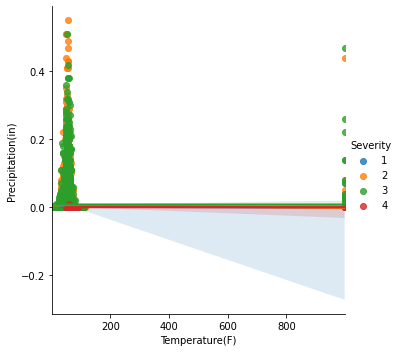

In [ ]:
#analise de lmplot
sns.lmplot(x = 'Temperature(F)', y = 'Precipitation(in)', hue = 'Severity', data = acidente_clima)

In [ ]:
#analise de qnd de acidente x severidade x região 
acidente_sev = acidentes_renomeado.groupby(['Severity', 'City'])['Severity'].count().reset_index(name='Qtd')
acidente_sev = acidente_regiao.sort_values(by='Severity', ascending = False)
acidente_sev

,Severity,City,Qtd
1266,4,Sylmar,1
1252,4,Irvine,1
1238,4,Burbank,1
1239,4,Calistoga,1
1240,4,Colton,1
...,...,...,...
52,1,Sacramento,2
53,1,San Diego,2
54,1,San Francisco,3
55,1,San Jose,5


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

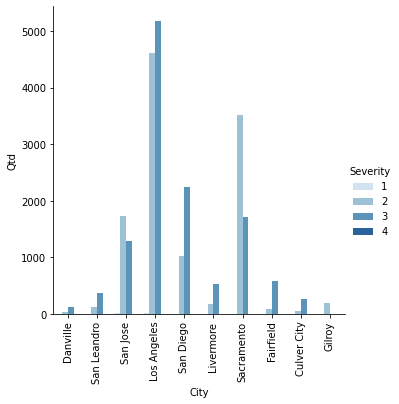

In [ ]:
#grafico de barras
__= sns.catplot(data = acidente_sev, x = 'City', y = 'Qtd', hue = 'Severity', order = acidente_regiao['City'].value_counts().iloc[:10].index, kind = 'bar', palette = 'Blues', col_order = 'Severity')
plt.xticks(rotation=90)